<a href="https://colab.research.google.com/github/Aayush-Borkar/ML-Lab/blob/main/ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Display configurations
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
print(f"TensorFlow version: {tf.__version__}")


TensorFlow version: 2.17.1


In [2]:
# Load sample dataset (Iris dataset as an example)
from sklearn.datasets import load_iris
data = load_iris()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Basic data exploration
print(df.info())
print(df.describe())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000        

In [3]:
# Data preprocessing
from sklearn.model_selection import train_test_split
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (120, 4)
Test data shape: (30, 4)


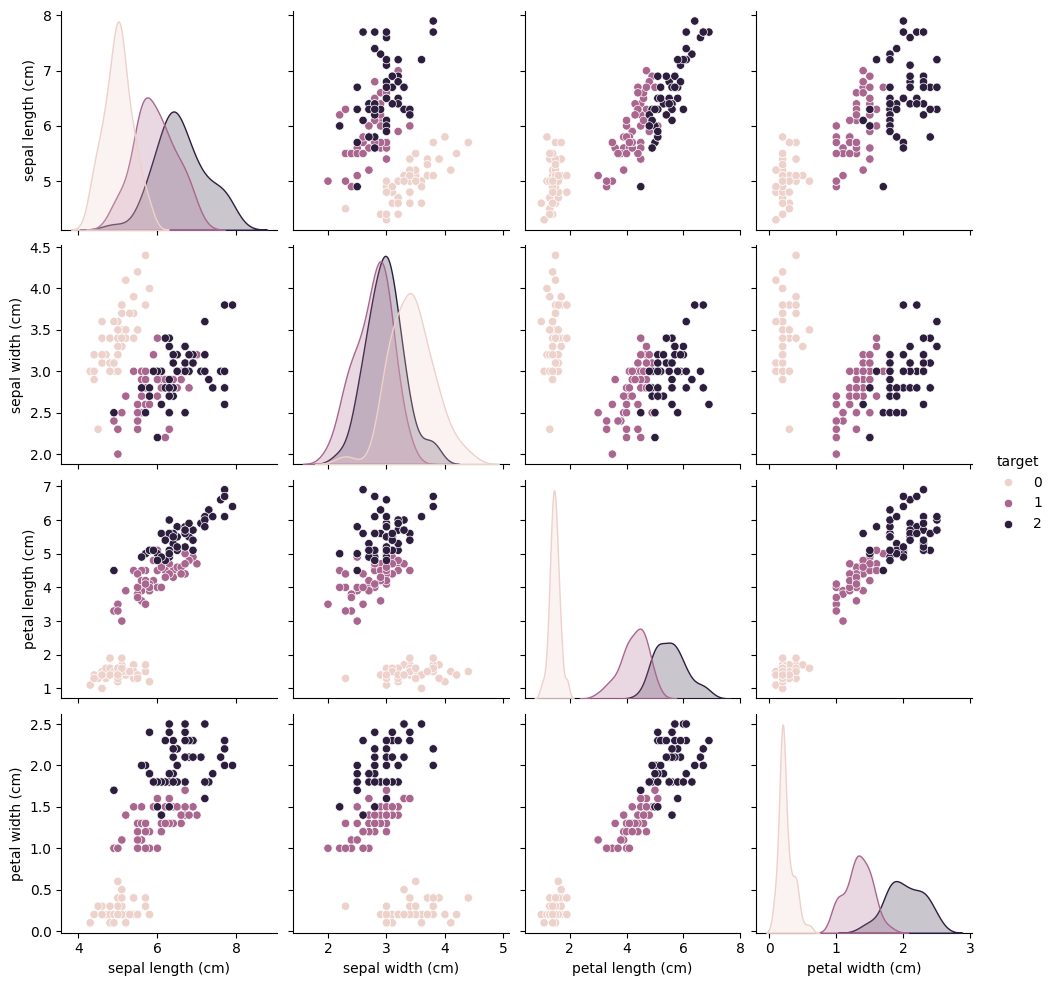

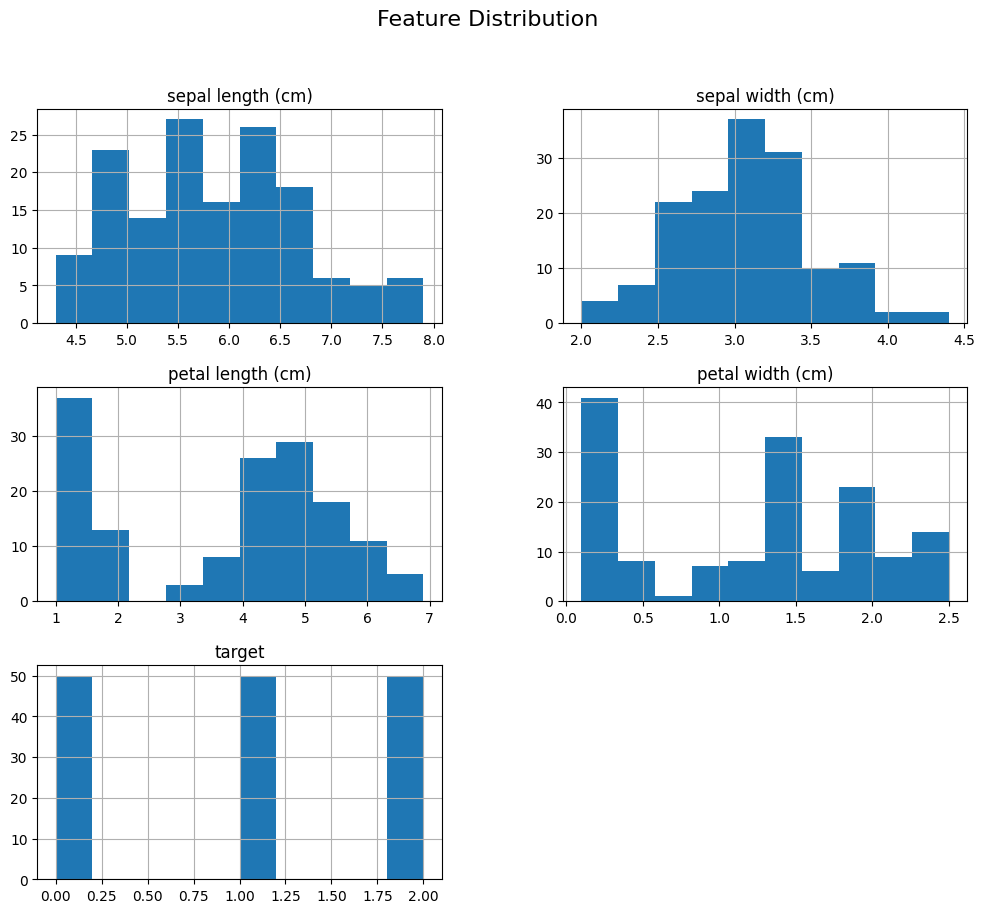

In [4]:
# Example: Pairplot visualization
import seaborn as sns
sns.pairplot(df, hue='target', diag_kind='kde')
plt.show()

# Plot data distribution
df.hist(figsize=(12, 10))
plt.suptitle('Feature Distribution', fontsize=16)
plt.show()


In [5]:
# Build a basic neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(data.target_names), activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.5240 - loss: 0.9394 - val_accuracy: 0.7000 - val_loss: 0.7989
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6727 - loss: 0.7865 - val_accuracy: 0.7333 - val_loss: 0.7165
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8196 - loss: 0.7231 - val_accuracy: 0.9667 - val_loss: 0.6746
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9244 - loss: 0.6700 - val_accuracy: 0.9000 - val_loss: 0.6030
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9187 - loss: 0.6148 - val_accuracy: 0.9000 - val_loss: 0.5564
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9096 - loss: 0.5660 - val_accuracy: 0.8667 - val_loss: 0.5108
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9006 - loss: 0.5178 - val_accuracy: 0.8667 - val_loss: 0.4719
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9021 - loss: 0.4727 - val_accuracy: 0.9667 - val_loss: 0.4432


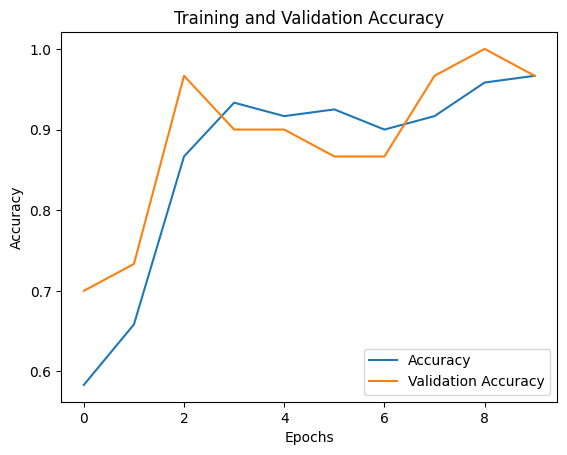

In [8]:
# Visualize training progress
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9667 - loss: 0.3947
Test Accuracy: 0.97


In [10]:
# Save the model
model.save('outputs/basic_model.h5')

# Load the model
loaded_model = tf.keras.models.load_model('outputs/basic_model.h5')
print("Model loaded successfully!")


Model loaded successfully!
